# DDM for matched controls

Check how controls fit DDM

In [1]:
%matplotlib inline
%cd ..

import warnings; warnings.filterwarnings('ignore')

/Users/celefthe/Programming/projects/language_decision


In [6]:
import hddm

data = hddm.load_csv('data/controls_clean.csv')

model = hddm.HDDM(data, depends_on={'v': 'stim'})
model.find_starting_values()
model.sample(6000, burn=20)

 [-----------------100%-----------------] 6000 of 6000 complete in 102.1 sec

In [7]:
model.print_stats()

                      mean        std       2.5q        25q        50q        75q     97.5q       mc err
a                  1.97919   0.123825    1.74986    1.90687    1.97371     2.0448   2.23047   0.00249048
a_std             0.243579   0.148476  0.0691908    0.15506   0.212682   0.295182  0.588057   0.00458231
a_subj.18439       1.98831   0.126877    1.75367    1.90218    1.98497    2.06852   2.25784   0.00375598
a_subj.18941       1.94927    0.11125     1.7345    1.87464    1.94779    2.02242   2.17011   0.00249918
a_subj.19621       1.91691   0.084864     1.7589    1.85841    1.91591    1.97285   2.08872   0.00165564
a_subj.19679        1.9785   0.105615    1.78286     1.9066    1.97438    2.04594   2.20001   0.00250165
a_subj.19718       1.77198  0.0970987    1.59262    1.70428    1.76878    1.83597   1.97309    0.0025864
a_subj.20373       2.25379   0.148355    1.99065    2.14568    2.24478    2.35334   2.56451   0.00448595
v(CP)             0.635722   0.309002  0.0355114   0.43

Plotting a
Plotting a_std
Plotting v(CP)
Plotting v(CS)
Plotting v(SS)
Plotting v(US)
Plotting v_std
Plotting t
Plotting t_std


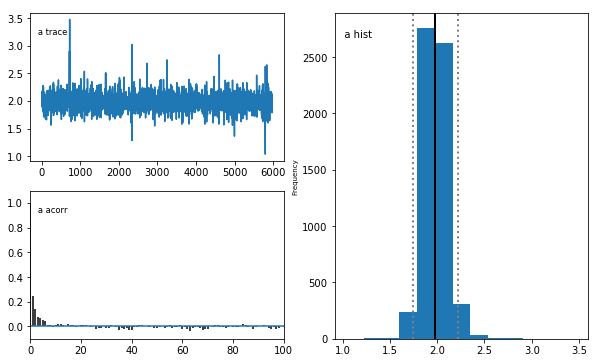

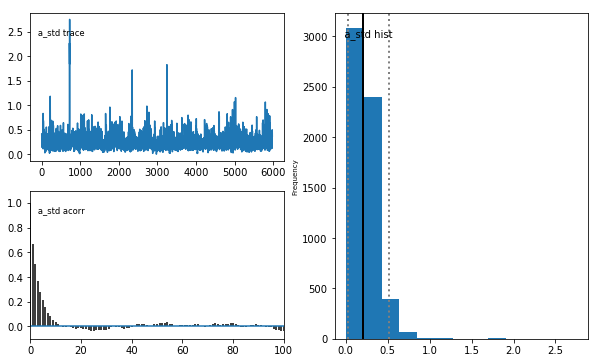

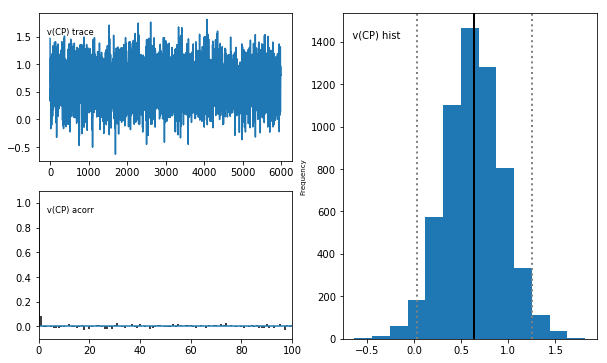

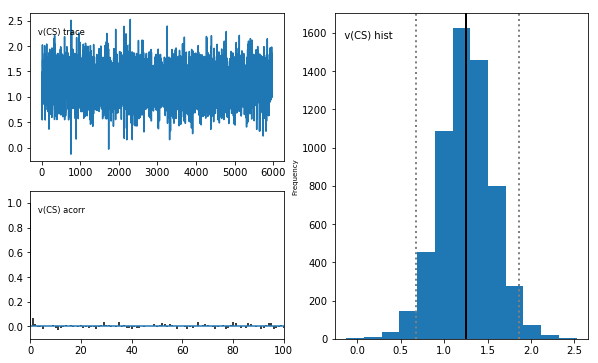

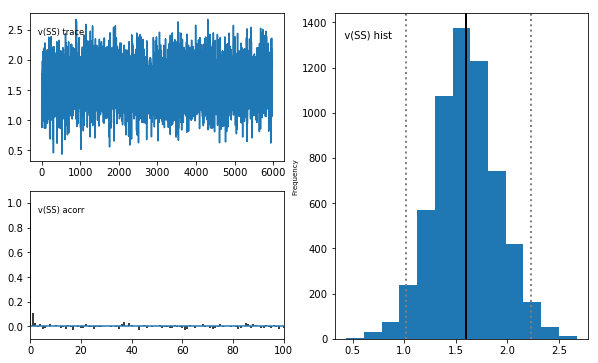

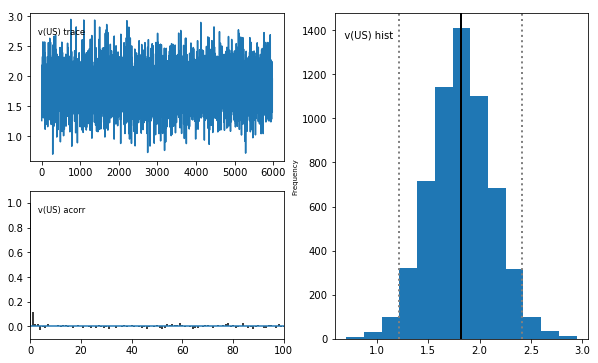

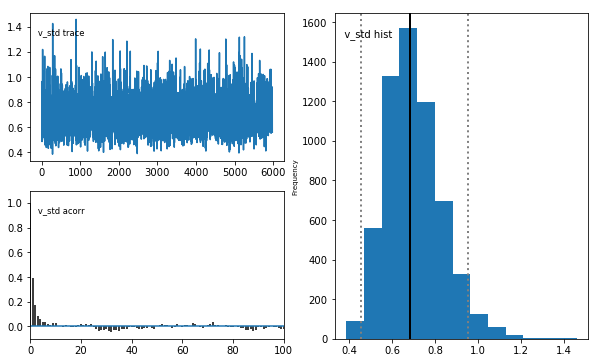

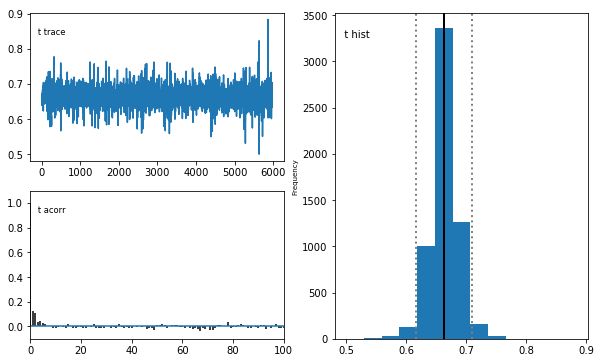

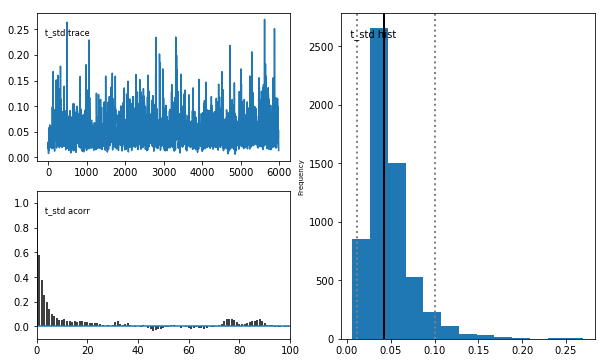

In [8]:
model.plot_posteriors()

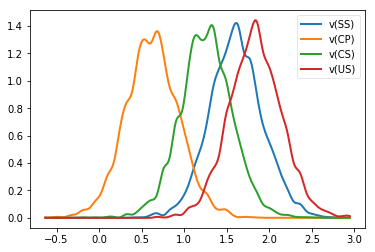

In [9]:
v_SS, v_CP, v_CS, v_US = model.nodes_db.node[['v(SS)', 'v(CP)', 'v(CS)', 'v(US)']]

hddm.analyze.plot_posterior_nodes([v_SS, v_CP, v_CS, v_US])

In [11]:
print('P(SS > US) = ' + str((v_SS.trace() > v_US.trace()).mean()))
print('P(CP > SS) = ' + str((v_CP.trace() > v_SS.trace()).mean()))
print('P(CS > SS) = ' + str((v_CS.trace() > v_SS.trace()).mean()))
print('P(CP > CS) = ' + str((v_CP.trace() > v_CS.trace()).mean()))

P(SS > US) = 0.302341137124
P(CP > SS) = 0.0142140468227
P(CS > SS) = 0.203344481605
P(CP > CS) = 0.069397993311
